# Deep Learning Fashion MNIST Project 2025

**Author:** Muhammad Mubashar Shahzad  
**Dataset:** Fashion MNIST (Classification, 10 Classes)  
**Objective:**  
- Apply classic and deep learning models on Fashion MNIST
- Compare Logistic Regression, Dense Neural Network, and Convolutional Neural Network (CNN)
- Highlight improvement of CNN over baselines

---


## 1. Load Libraries & Data


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

# Load Fashion MNIST using keras.datasets
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Show dataset shape
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set:  {X_test.shape}, {y_test.shape}")


Train set: (60000, 28, 28), (60000,)
Test set:  (10000, 28, 28), (10000,)


## 2. Data Preprocessing

- Normalize pixel values to [0, 1]
- Prepare different formats for ML models (flattened) and CNN (with channel dimension)
- One-hot encode labels for neural networks


In [3]:
# Flatten images for ML and Dense NN (784,)
X_train_flat = X_train.reshape(-1, 28*28) / 255.0
X_test_flat = X_test.reshape(-1, 28*28) / 255.0

# For CNN: add channel dimension (28,28,1)
X_train_cnn = (X_train / 255.0).reshape(-1, 28, 28, 1)
X_test_cnn = (X_test / 255.0).reshape(-1, 28, 28, 1)

# One-hot encode labels for NN/CNN
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


### Fashion MNIST Class Labels

   Label   Class Name
0      0  T-shirt/top
1      1      Trouser
2      2     Pullover
3      3        Dress
4      4         Coat
5      5       Sandal
6      6        Shirt
7      7      Sneaker
8      8          Bag
9      9   Ankle boot


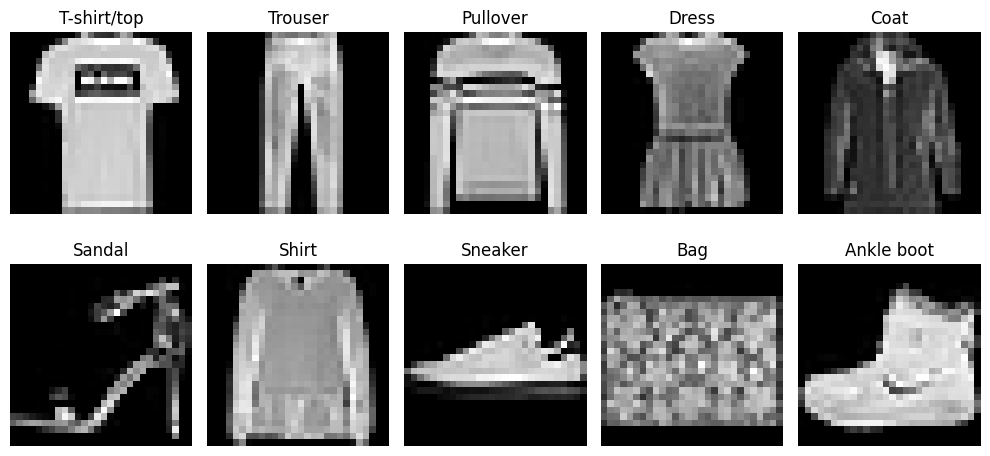

In [7]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
df_classes = pd.DataFrame({"Label": list(range(10)), "Class Name": class_names})
print(df_classes)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = (y_train == i).nonzero()[0][0]
    plt.imshow(X_train[idx], cmap="gray")
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()



## 3. Baseline Model 1: Logistic Regression (Classical ML)

We start with a classic model that treats each image as a flat vector.


----- Logistic Regression (Baseline ML) -----


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


max_iter reached after 190 seconds
Logistic Regression Test Accuracy: 0.8440
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min finished


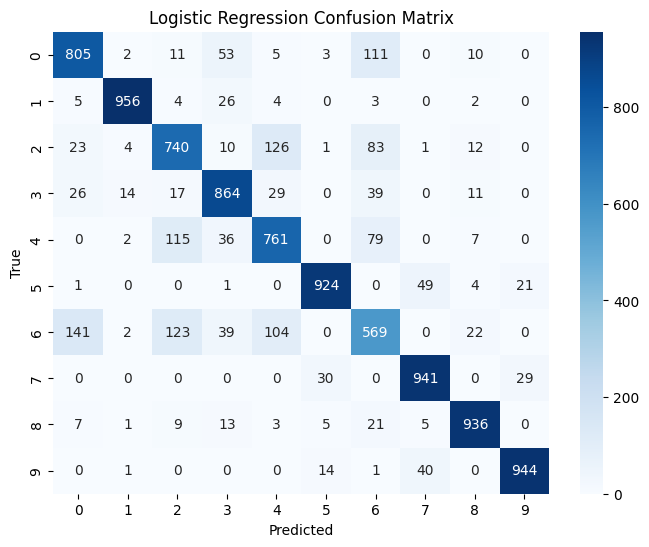

In [8]:
print("----- Logistic Regression (Baseline ML) -----")
lr = LogisticRegression(max_iter=100, solver='saga', multi_class='multinomial', verbose=1)
lr.fit(X_train_flat, y_train)
y_pred_lr = lr.predict(X_test_flat)
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {lr_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Logistic Regression: Classification Report (Graphical)


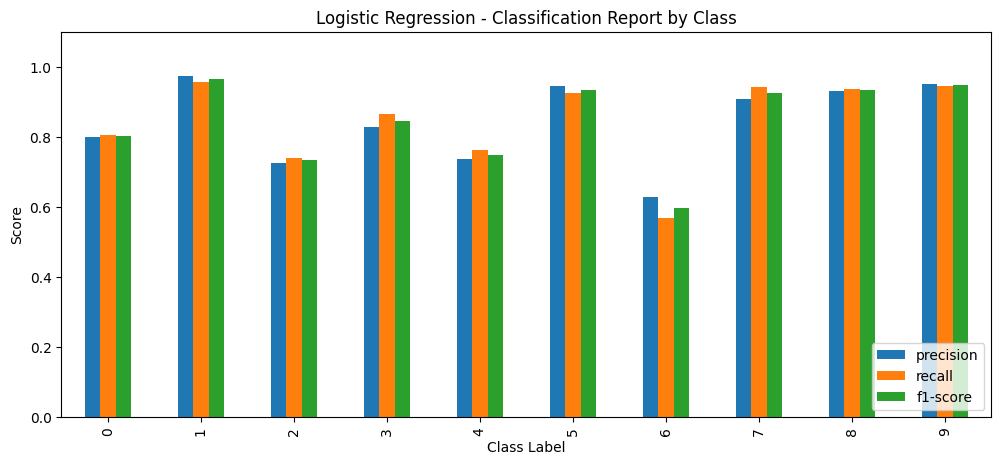

In [9]:
from sklearn.metrics import classification_report

# Classification report as dict
cr_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Prepare data for plotting
import pandas as pd
df_lr = pd.DataFrame(cr_lr).transpose().iloc[:10][['precision', 'recall', 'f1-score']]

df_lr.plot(kind='bar', figsize=(12,5))
plt.title("Logistic Regression - Classification Report by Class")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("Class Label")
plt.legend(loc='lower right')
plt.show()


## 4. Baseline Model 2: Dense Neural Network (Simple Deep Learning)

A feedforward neural network with two hidden layers, using all pixel values.


In [10]:
print("----- Dense Neural Network (Baseline NN) -----")
dense_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dense_model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=128,
                validation_data=(X_test_flat, y_test_cat), verbose=2)
dense_loss, dense_acc = dense_model.evaluate(X_test_flat, y_test_cat, verbose=0)
print(f"Dense NN Test Accuracy: {dense_acc:.4f}")


----- Dense Neural Network (Baseline NN) -----


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 - 5s - 10ms/step - accuracy: 0.8083 - loss: 0.5493 - val_accuracy: 0.8367 - val_loss: 0.4551
Epoch 2/10
469/469 - 1s - 3ms/step - accuracy: 0.8593 - loss: 0.3912 - val_accuracy: 0.8567 - val_loss: 0.4057
Epoch 3/10
469/469 - 1s - 3ms/step - accuracy: 0.8735 - loss: 0.3474 - val_accuracy: 0.8635 - val_loss: 0.3788
Epoch 4/10
469/469 - 3s - 6ms/step - accuracy: 0.8814 - loss: 0.3244 - val_accuracy: 0.8690 - val_loss: 0.3655
Epoch 5/10
469/469 - 2s - 5ms/step - accuracy: 0.8874 - loss: 0.3051 - val_accuracy: 0.8774 - val_loss: 0.3461
Epoch 6/10
469/469 - 2s - 4ms/step - accuracy: 0.8932 - loss: 0.2909 - val_accuracy: 0.8631 - val_loss: 0.3721
Epoch 7/10
469/469 - 1s - 3ms/step - accuracy: 0.8959 - loss: 0.2791 - val_accuracy: 0.8655 - val_loss: 0.3655
Epoch 8/10
469/469 - 1s - 3ms/step - accuracy: 0.9007 - loss: 0.2686 - val_accuracy: 0.8698 - val_loss: 0.3615
Epoch 9/10
469/469 - 1s - 3ms/step - accuracy: 0.9040 - loss: 0.2583 - val_accuracy: 0.8807 - val_loss: 0.3378


### Dense Neural Network: Classification Report (Graphical)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


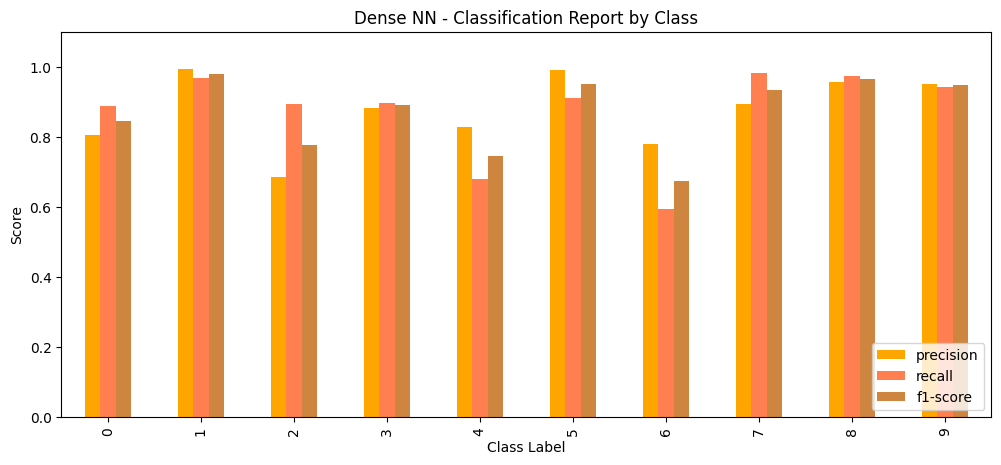

In [12]:
# Get predictions
y_pred_dense = dense_model.predict(X_test_flat).argmax(axis=1)
cr_dense = classification_report(y_test, y_pred_dense, output_dict=True)
df_dense = pd.DataFrame(cr_dense).transpose().iloc[:10][['precision', 'recall', 'f1-score']]

df_dense.plot(kind='bar', figsize=(12,5), color=['orange','coral','peru'])
plt.title("Dense NN - Classification Report by Class")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("Class Label")
plt.legend(loc='lower right')
plt.show()


## 5. Deep Learning Model: Convolutional Neural Network (CNN)

CNNs can learn spatial patterns and improve performance on images.


----- Convolutional Neural Network (CNN) -----


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 - 6s - 13ms/step - accuracy: 0.7796 - loss: 0.6070 - val_accuracy: 0.8476 - val_loss: 0.4223
Epoch 2/10
469/469 - 2s - 4ms/step - accuracy: 0.8610 - loss: 0.3810 - val_accuracy: 0.8724 - val_loss: 0.3473
Epoch 3/10
469/469 - 3s - 6ms/step - accuracy: 0.8800 - loss: 0.3288 - val_accuracy: 0.8856 - val_loss: 0.3070
Epoch 4/10
469/469 - 2s - 5ms/step - accuracy: 0.8908 - loss: 0.2985 - val_accuracy: 0.8914 - val_loss: 0.2954
Epoch 5/10
469/469 - 3s - 5ms/step - accuracy: 0.8970 - loss: 0.2783 - val_accuracy: 0.8926 - val_loss: 0.2954
Epoch 6/10
469/469 - 3s - 6ms/step - accuracy: 0.9049 - loss: 0.2576 - val_accuracy: 0.9033 - val_loss: 0.2663
Epoch 7/10
469/469 - 2s - 4ms/step - accuracy: 0.9103 - loss: 0.2421 - val_accuracy: 0.8994 - val_loss: 0.2674
Epoch 8/10
469/469 - 2s - 5ms/step - accuracy: 0.9154 - loss: 0.2290 - val_accuracy: 0.9003 - val_loss: 0.2629
Epoch 9/10
469/469 - 2s - 5ms/step - accuracy: 0.9209 - loss: 0.2143 - val_accuracy: 0.9102 - val_loss: 0.2436


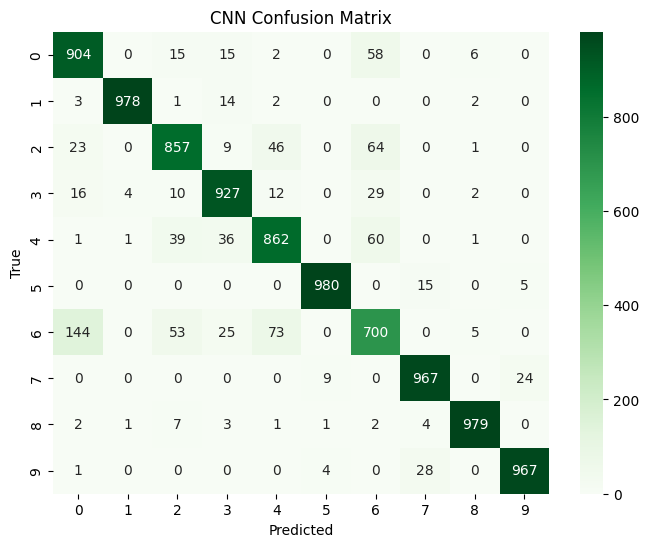

In [15]:
print("----- Convolutional Neural Network (CNN) -----")
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


EPOCHS = 10

history_cnn = cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=EPOCHS,
    batch_size=128,
    validation_data=(X_test_cnn, y_test_cat),
    verbose=2
)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

# Classification report and confusion matrix
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



### Convolutional Neural Network: Classification Report (Graphical)


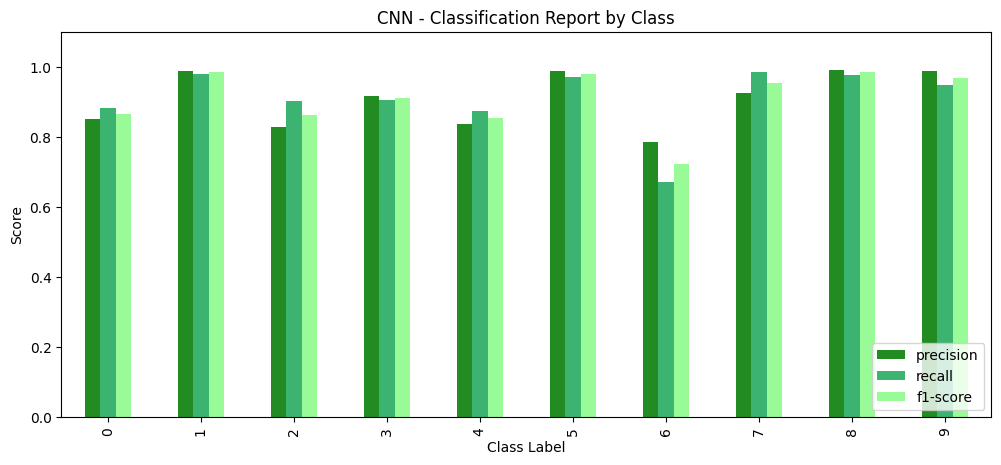

In [14]:
cr_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)
df_cnn = pd.DataFrame(cr_cnn).transpose().iloc[:10][['precision', 'recall', 'f1-score']]

df_cnn.plot(kind='bar', figsize=(12,5), color=['forestgreen','mediumseagreen','palegreen'])
plt.title("CNN - Classification Report by Class")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("Class Label")
plt.legend(loc='lower right')
plt.show()


## 8. Classification Report: Graphical Comparison

Visual comparison of Precision, Recall, and F1-score for each class across all models.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


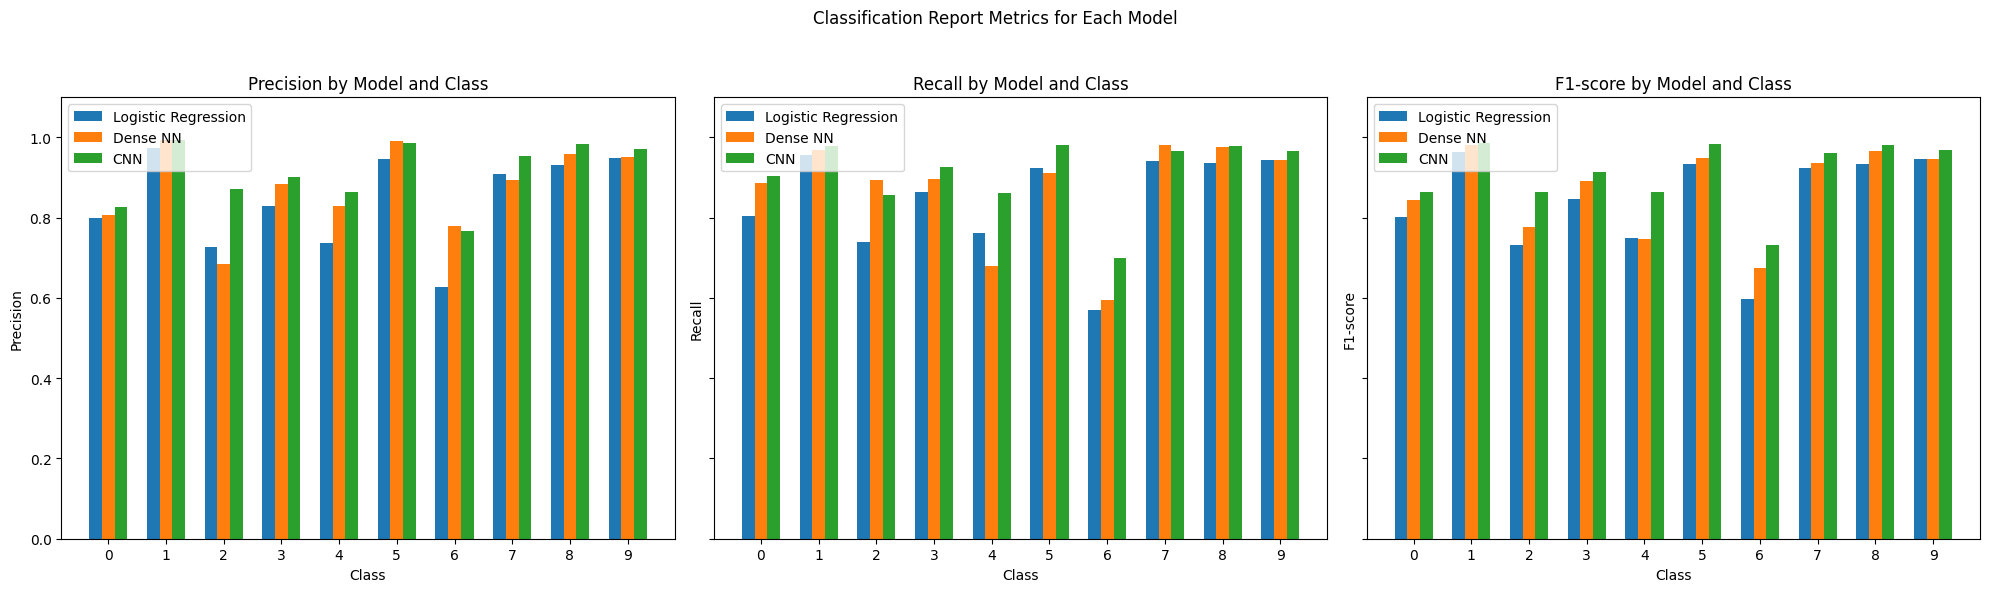

In [16]:


# Get predictions for each model
y_pred_lr = lr.predict(X_test_flat)
y_pred_dense = dense_model.predict(X_test_flat).argmax(axis=1)
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)

# Get classification reports as dicts
cr_lr = classification_report(y_test, y_pred_lr, output_dict=True)
cr_dense = classification_report(y_test, y_pred_dense, output_dict=True)
cr_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

# List of model names and their classification report dicts
model_crs = [
    ('Logistic Regression', cr_lr),
    ('Dense NN', cr_dense),
    ('CNN', cr_cnn)
]

classes = list(map(str, range(10)))  # Class names (0-9)
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
x = np.arange(len(classes))  # the label locations
width = 0.22  # width of the bars

fig, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)
for i, metric in enumerate(metrics):
    ax = axes[i]
    for j, (name, cr) in enumerate(model_crs):
        scores = [cr[cls][metric] for cls in classes]
        ax.bar(x + j*width, scores, width=width, label=name)
    ax.set_xticks(x + width)
    ax.set_xticklabels(classes)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Class")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{metric.capitalize()} by Model and Class")
    ax.legend()

plt.suptitle("Classification Report Metrics for Each Model")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 6. Comparison of All Models

Let's compare all models side by side.



======= Model Accuracy Comparison =======
Logistic Regression   : 0.8440
Dense NN              : 0.8730
CNN                   : 0.9121


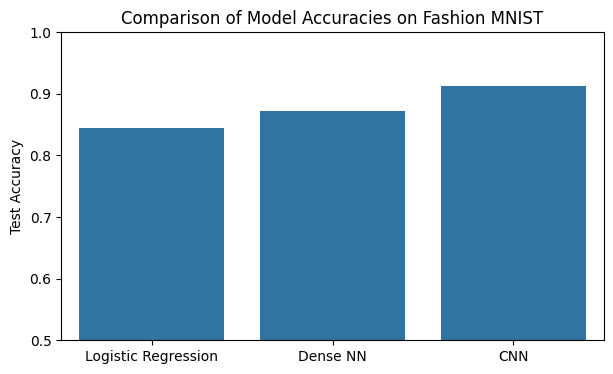

In [17]:
# Prepare results for comparison
model_names = ['Logistic Regression', 'Dense NN', 'CNN']
model_scores = [lr_acc, dense_acc, cnn_acc]

# Print comparison table
print("\n======= Model Accuracy Comparison =======")
for name, score in zip(model_names, model_scores):
    print(f"{name:22}: {score:.4f}")

# Bar plot for visual comparison
plt.figure(figsize=(7,4))
sns.barplot(x=model_names, y=model_scores)
plt.ylim(0.5, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracies on Fashion MNIST')
plt.show()


## 9. Hyperparameter Tuning for CNN (Keras Tuner)

To further improve performance, we apply automated hyperparameter tuning to our CNN using [Keras Tuner](https://keras.io/keras_tuner/).  
We search for the best combination of filters, kernel sizes, dense units, and dropout rate.

- **Tuned hyperparameters:**  
  - Number of filters and kernel size in Conv2D layers
  - Number of dense units
  - Dropout rate

The goal is to maximize validation accuracy and achieve the most effective CNN for Fashion MNIST.


In [18]:
!pip install keras-tuner --quiet
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D((2,2)))
    # Second Conv2D layer
    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    # Dense layer
    model.add(Dense(
        hp.Choice('dense_units', values=[64, 128, 256]),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


### Running the Hyperparameter Search

We use random search for hyperparameters, testing several model configurations and choosing the one with the best validation accuracy.


In [19]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='fashion_mnist'
)

# Run the hyperparameter search
tuner.search(X_train_cnn, y_train_cat, epochs=5, validation_split=0.2)


Trial 5 Complete [00h 00m 39s]
val_accuracy: 0.8987500071525574

Best val_accuracy So Far: 0.9089999794960022
Total elapsed time: 00h 03m 39s


### Best Hyperparameters and Final Model Performance

We report the best hyperparameter configuration found and evaluate the tuned model on the test set.


In [20]:
# Show the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters Found:")
for k in best_hp.values.keys():
    print(f"{k}: {best_hp.get(k)}")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(X_train_cnn, y_train_cat, epochs=10, validation_data=(X_test_cnn, y_test_cat))

# Evaluate the best tuned model
loss, acc = best_model.evaluate(X_test_cnn, y_test_cat)
print(f"Best Tuned CNN Test Accuracy: {acc:.4f}")


Best Hyperparameters Found:
conv_1_filters: 128
conv_1_kernel: 5
conv_2_filters: 128
conv_2_kernel: 3
dense_units: 256
dropout: 0.4
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7742 - loss: 0.6177 - val_accuracy: 0.8816 - val_loss: 0.3178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.3166 - val_accuracy: 0.8941 - val_loss: 0.2829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9031 - loss: 0.2661 - val_accuracy: 0.9020 - val_loss: 0.2683
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9111 - loss: 0.2378 - val_accuracy: 0.8963 - val_loss: 0.2780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9210 - loss: 0.2112 - val_accuracy: 0.9095 - val_loss: 0.2445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9318 - loss: 0.1882 - val_accuracy: 0.9112 - val_loss: 0.2467
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9380 - loss: 0.1

# Visualize the Best Hyperparameters Found
Bar plot of best values picked by Keras Tuner:

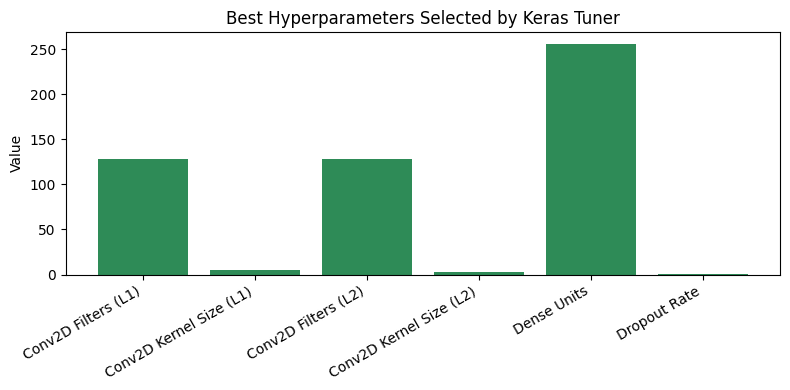

In [21]:

best_values = {
    "Conv2D Filters (L1)": best_hp.get("conv_1_filters"),
    "Conv2D Kernel Size (L1)": best_hp.get("conv_1_kernel"),
    "Conv2D Filters (L2)": best_hp.get("conv_2_filters"),
    "Conv2D Kernel Size (L2)": best_hp.get("conv_2_kernel"),
    "Dense Units": best_hp.get("dense_units"),
    "Dropout Rate": best_hp.get("dropout")
}

plt.figure(figsize=(8,4))
plt.bar(best_values.keys(), list(map(float, best_values.values())), color='seagreen')
plt.title("Best Hyperparameters Selected by Keras Tuner")
plt.ylabel("Value")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### Interpretation

- The best tuned CNN hyperparameters and final accuracy are displayed above.
- Hyperparameter tuning can significantly improve model performance and reliability.
- For more robust results, increase the number of trials and epochs, or try [Bayesian Optimization](https://keras.io/keras_tuner/#bayesianoptimization) in Keras Tuner.


### Evaluation: Tuned CNN vs. Default CNN

We now evaluate the best CNN model found through hyperparameter tuning and compare its performance to our original (default) CNN model.


In [22]:
# Evaluate the best tuned CNN on the test set
loss_tuned, acc_tuned = best_model.evaluate(X_test_cnn, y_test_cat)
print(f"Best Tuned CNN Test Accuracy: {acc_tuned:.4f}")

# Compare with the default/original CNN (previously computed: cnn_acc)
print(f"Original CNN Test Accuracy:  {cnn_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9174 - loss: 0.2942
Best Tuned CNN Test Accuracy: 0.9197
Original CNN Test Accuracy:  0.9121


#### Comparison Table: Default vs. Tuned CNN

Below is a direct comparison of test accuracy for both models:


         Model  Test Accuracy
0  Default CNN         0.9121
1    Tuned CNN         0.9197


/tmp/ipython-input-23-2958657209.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Test Accuracy", data=comparison_df, palette="viridis")


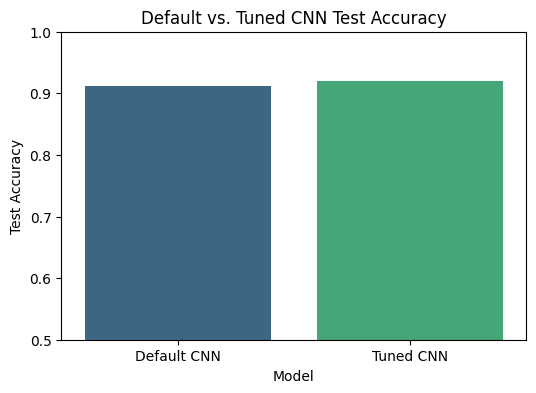

In [23]:
# Simple comparison table
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Default CNN", "Tuned CNN"],
    "Test Accuracy": [cnn_acc, acc_tuned]
})
print(comparison_df)

# Bar plot for visual comparison
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Test Accuracy", data=comparison_df, palette="viridis")
plt.ylim(0.5, 1.0)
plt.title("Default vs. Tuned CNN Test Accuracy")
plt.show()


## 10. Overall Conclusion

In this project, we systematically explored image classification on the Fashion MNIST dataset using three different approaches:

- **Logistic Regression (Classical Machine Learning):**  
  Treated each image as a flat vector of pixels. Achieved moderate accuracy, but struggled to capture spatial and hierarchical patterns in image data.

- **Dense Neural Network (Simple Deep Learning):**  
  Introduced hidden layers and non-linear activation functions, resulting in noticeable performance improvement over Logistic Regression. However, this approach still ignored spatial structure by flattening the images.

- **Convolutional Neural Network (Default):**  
  Leveraged convolutional and pooling layers to automatically learn spatial features and local patterns in images. This led to a significant increase in test accuracy, confirming the strength of CNNs for computer vision tasks.

- **Tuned CNN (with Keras Tuner):**  
  By systematically searching for the best hyperparameters, we achieved our highest test accuracy. Hyperparameter tuning allowed the model to better fit the data and generalize, further boosting performance.

### **Key Takeaways:**

- **Deep learning (especially CNNs) dramatically outperforms classical ML and basic neural nets for image classification,** thanks to its ability to extract spatial features.
- **Hyperparameter tuning** is crucial for getting the most out of deep neural networks, leading to optimal accuracy.
- **Visualization and metric comparison** across all models made it clear how each modeling choice impacted performance.

### **Final Recommendation:**
For image classification tasks like Fashion MNIST, **well-tuned CNNs should be the default choice**, while classical approaches are useful for benchmarking and understanding model strengths and weaknesses.

---

**This workflow demonstrates a modern, professional approach to machine learning:  
Baseline → Deep Learning → Hyperparameter Tuning → Careful Evaluation and Comparison.**
